# Марихуана и скорость реакции

Изучалось воздействие марихуаны на скорость реакции. 
В качестве испытуемых
были выбраны по 12 человек из каждой категории:
* никогда не пробовали марихуану;
* иногда употребляют марихуану;
* регулярно употребляют марихуану.

Испытуемые были разделены на две равные группы; половине из них дали
выкурить две сигареты с марихуаной, вторая половина выкурила две обычные
сигареты с запахом и вкусом марихуаны. Сразу после этого все испытуемые прошли
тест на скорость реакции.
Требуется оценить влияние марихуаны на скорость реакции, учитывая фактор
предыдущего опыта употребления.

## Загрузим данные и посмотрим на них

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
data = pd.read_csv('./weed.txt', delimiter='\t')
data.head()

,Placebo/Marijuana,None,Light,Moderate
0,1,795,800,790
1,1,605,705,600
2,1,700,610,695
3,1,752,757,752
4,1,648,645,634


In [84]:
data.describe()

,Placebo/Marijuana,None,Light,Moderate
count,12.000000,12.000000,12.000000,12.000000
mean,1.500000,790.416667,733.416667,739.166667
std,0.522233,110.027648,70.766528,101.902657
min,1.000000,605.000000,610.000000,600.000000
25%,1.000000,707.500000,695.000000,680.000000
50%,1.500000,803.000000,735.000000,739.500000
75%,2.000000,868.250000,782.000000,784.000000
max,2.000000,965.000000,843.000000,983.000000


Отделим марихуану от плацебо

In [85]:
placebo = data[data['Placebo/Marijuana']==1]
placebo.head()

,Placebo/Marijuana,None,Light,Moderate
0,1,795,800,790
1,1,605,705,600
2,1,700,610,695
3,1,752,757,752
4,1,648,645,634


In [86]:
weed = data[data['Placebo/Marijuana']==2]
weed.head()

,Placebo/Marijuana,None,Light,Moderate
6,2,965,843,983
7,2,878,765,744
8,2,865,713,735
9,2,916,776,782
10,2,811,810,815


Переведем выборку в более адекватное представление: один объект == один человек

In [87]:
new_data = []
for i in data.values:
    new_data.append({'placebo': i[0]==1, 'time': i[1], 'type':'none'})
    new_data.append({'placebo': i[0]==1, 'time': i[2], 'type':'light'})
    new_data.append({'placebo': i[0]==1, 'time': i[3], 'type':'moderate'})
new_data = pd.DataFrame(new_data)
new_data.head()

,placebo,time,type
0,True,795,none
1,True,800,light
2,True,790,moderate
3,True,605,none
4,True,705,light


In [88]:
len(new_data)

36

## Посмотрим распределение времени реакции

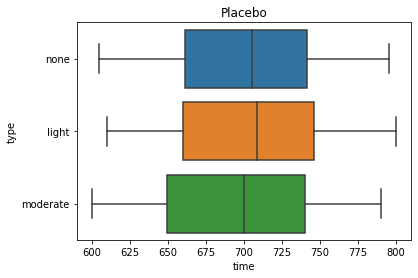

In [89]:
sns.boxplot(data=new_data[new_data['placebo']==True], x='time', y='type' )
_ = plt.title('Placebo')

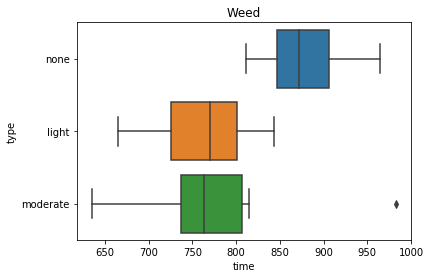

In [90]:
sns.boxplot(data=new_data[new_data['placebo']==False], x='time', y='type' )
_ = plt.title('Weed')

## Дисперсионный анализ

In [91]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

### Двухфакторный анализ (плацебо + тип курильщика)

In [92]:
lm = ols('time ~ C(type) + C(placebo) + C(placebo):C(type)',  data=new_data).fit()

---

#### Что произошло?

$$X_{ijk} = \mu + \alpha_i + \beta_j + \gamma_{ij} + \varepsilon_{ijk},$$
$$i = 1, ..., K_1,\ j = 1, ..., K_2,\ k = 1, ..., n.$$

- $\mu$ -- общее среднее значение признака,
- $\alpha_i$ -- воздействие уровня $i$ фактора $f_1$,
- $\beta_j$ -- воздействие уровня $j$ фактора $f_2$,
- $\gamma_{ij}$ -- дополнительное воздействие комбинации уровней $i$ и $j$ факторов $f_1$ и $f_2$,
- $\varepsilon_{ijk}$ -- случайные независимые одинаково распределенные ошибки

- ```ols``` -- метод наименьших квадратов для задачи регрессии
- Внутри используется формула из ```patsy``` ([описание синтаксиса формул patsy](https://patsy.readthedocs.io/en/latest/formulas.html#formulas))

Краткий экскурс в формулы ```patsy```.

- Формула разделяется на:
    - левую часть: ```time``` -- целевой признак
    - правую часть: ```C(type) + C(placebo) + C(placebo):C(type)``` -- выражение, состоящее из факторов, чьё воздействие на целевой признак мы исследуем, и некоторых операций
- `~` -- разделение левой и правой части
- `+` -- берем во внимание только сами признаки, не учитывая их внутренние взаимодействия ($A \cup B \backslash A \cap B$)
- `:` -- берем во внимание только внутренние взаимодействия между признаками ($A \cap B$)
- `*` -- берем во внимание как сами признаки, так и их внутренние взаимодействия ($A \cup B$)
- `С(...)` -- категориальный признак

---

Можно посмотреть различную информацию о полученной модели

In [93]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     5.130
Date:                Tue, 24 Mar 2020   Prob (F-statistic):            0.00162
Time:                        18:12:50   Log-Likelihood:                -203.97
No. Observations:                  36   AIC:                             419.9
Df Residuals:                      30   BIC:                             429.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                762.0000     31.251     24.383      0.000     698.176     825.824
C(type)[T.moderate]                       20.3333     44.196      0.460      0.649     -69.927     110.594
C(type)[T.none]                          117.1667     44.196      2.651      0.013      26.906     207.427
C(placebo)[T.True]                       -57.1667     44.196     -1.293      0.206    -147.427      33.094
C(placebo)[T.True]:C(type)[T.moderate]   -29.1667     62.503     -0.467      0.644    -156.814      98.481
C(placebo)[T.True]:C(type)[T.none]      -120.3333     62.503     -1.925      0.064    -247.981       7.314
==============================================================================
Omnibus:                        1.835   Durbin-Watson:                   1.153
Prob(Omnibus):                  0.400   Jarque-Bera (JB):                0.941
Skew:                           0.356   Prob(JB):                        0.625
Kurtosis:                       3.346   Cond. No.                         9.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
sm.stats.anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
C(type),2.0,23634.500000,11817.250000,2.016638,0.150752
C(placebo),1.0,103041.000000,103041.000000,17.584155,0.000224
C(placebo):C(type),2.0,23642.166667,11821.083333,2.017292,0.150665
Residual,30.0,175796.333333,5859.877778,NaN,NaN


Гипотеза о том, что предыдущий опыт употребления не влияет на скорость
реакции, не отклоняется ⇒ данные по группам можно объединить.

In [95]:
lm = ols('time ~ C(placebo)', data=new_data).fit()

In [96]:
sm.stats.anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
C(placebo),1.0,103041.0,103041.000000,15.705146,0.00036
Residual,34.0,223073.0,6560.970588,NaN,NaN


### Критерий Стьюдента о равенстве матожиданий

In [97]:
from statsmodels.stats.weightstats  import ttest_ind

В предположении о равенстве дисперсий

In [98]:
ttest_ind(new_data[new_data['placebo']==True]['time'], new_data[new_data['placebo']==False]['time'], usevar='pooled')

(-3.9629718456124134, 0.00036003525353863977, 34.0)

Без предположения

In [99]:
ttest_ind(new_data[new_data['placebo']==True]['time'], new_data[new_data['placebo']==False]['time'], usevar='unequal')

(-3.9629718456124134, 0.0004149339054483141, 30.42418334548216)

Левосторонняя альтернатива

In [100]:
ttest_ind(new_data[new_data['placebo']==True]['time'], new_data[new_data['placebo']==False]['time'], alternative='smaller', usevar='pooled')

(-3.9629718456124134, 0.00018001762676931988, 34.0)

## Итог:

- факт того, принимал ли человек раньше марихуану, не влияет на его скорость реакции
- при выкуривании марихуаны реакция человека значительно зампедляется